In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = np.load('/content/drive/MyDrive/Colab Notebooks/symmetric_line_grating_database.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/symmetric_line_grating_geometry.npy')
print("Shape of data:", X.shape)
print("Shape of geo_data:", y.shape)

Shape of data: (352800, 6, 121)
Shape of geo_data: (352800, 7)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

X_mlp = X.reshape((X.shape[0], -1))
scaler = StandardScaler()
X_mlp = scaler.fit_transform(X_mlp)

input_shape = X_mlp.shape[1]

X_temp, X_test, y_temp, y_test = train_test_split(X_mlp, y, test_size=0.2, random_state=42)
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

mlp_model = Sequential([
    Input(shape=(input_shape,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y.shape[1])  # Outputlaag
])

mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

mlp_history = mlp_model.fit(
    X_train_mlp, y_train_mlp,
    validation_data=(X_val_mlp, y_val_mlp),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

y_pred_mlp = mlp_model.predict(X_val_mlp)




Epoch 1/100
6615/6615 - 23s - 4ms/step - loss: 110.0574 - mae: 4.8485 - val_loss: 35.9824 - val_mae: 3.6377
Epoch 2/100
6615/6615 - 20s - 3ms/step - loss: 31.7400 - mae: 3.3721 - val_loss: 28.1146 - val_mae: 3.1854
Epoch 3/100
6615/6615 - 22s - 3ms/step - loss: 26.0030 - mae: 2.9721 - val_loss: 20.7872 - val_mae: 2.6292
Epoch 4/100
6615/6615 - 20s - 3ms/step - loss: 21.0663 - mae: 2.6523 - val_loss: 18.9925 - val_mae: 2.4304
Epoch 5/100
6615/6615 - 20s - 3ms/step - loss: 18.2181 - mae: 2.4393 - val_loss: 22.5271 - val_mae: 2.5679
Epoch 6/100
6615/6615 - 25s - 4ms/step - loss: 16.6099 - mae: 2.3161 - val_loss: 18.5688 - val_mae: 2.5761
Epoch 7/100
6615/6615 - 20s - 3ms/step - loss: 14.8935 - mae: 2.1784 - val_loss: 15.2057 - val_mae: 2.2297
Epoch 8/100
6615/6615 - 20s - 3ms/step - loss: 13.8370 - mae: 2.0987 - val_loss: 11.7598 - val_mae: 1.9455
Epoch 9/100
6615/6615 - 20s - 3ms/step - loss: 13.0956 - mae: 2.0335 - val_loss: 13.9674 - val_mae: 2.0529
Epoch 10/100
6615/6615 - 21s - 3ms/s

In [4]:
mlp_rmse = np.sqrt(mean_squared_error(y_val_mlp, y_pred_mlp))
mlp_mae = mean_absolute_error(y_val_mlp, y_pred_mlp)
mlp_r2 = r2_score(y_val_mlp, y_pred_mlp)

print("\n MLP Evaluation on validation set:")
print(f"MLP RMSE: {mlp_rmse:.4f}")
print(f"MLP MAE : {mlp_mae:.4f}")
print(f"MLP R²  : {mlp_r2:.4f}")



 MLP Evaluation on validation set:
MLP RMSE: 1.8940
MLP MAE : 1.0800
MLP R²  : 0.8266


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_cnn = np.load('/content/drive/MyDrive/Colab Notebooks/symmetric_line_grating_database.npy')
y_cnn = np.load('/content/drive/MyDrive/Colab Notebooks/symmetric_line_grating_geometry.npy')

X_temp, X_test, y_temp, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_cnn = scaler.fit_transform(X_train_cnn.reshape(X_train_cnn.shape[0], -1)).reshape(X_train_cnn.shape)
X_val_cnn = scaler.transform(X_val_cnn.reshape(X_val_cnn.shape[0], -1)).reshape(X_val_cnn.shape)

X_train_cnn = np.expand_dims(X_train_cnn, axis=-1)
X_val_cnn = np.expand_dims(X_val_cnn, axis=-1)

inp = Input(shape=X_train_cnn.shape[1:])
x = Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu')(inp)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Conv2D(128, kernel_size=(2, 2), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(y_train_cnn.shape[1], activation='linear')(x)

cnn_model = Model(inputs=inp, outputs=output)
cnn_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

y_pred_cnn = cnn_model.predict(X_val_cnn)




Epoch 1/20
6615/6615 - 62s - 9ms/step - loss: 75.7098 - val_loss: 36.5592
Epoch 2/20
6615/6615 - 61s - 9ms/step - loss: 30.2742 - val_loss: 32.0343
Epoch 3/20
6615/6615 - 82s - 12ms/step - loss: 23.4278 - val_loss: 20.5030
Epoch 4/20
6615/6615 - 82s - 12ms/step - loss: 18.2198 - val_loss: 19.6537
Epoch 5/20
6615/6615 - 82s - 12ms/step - loss: 15.0209 - val_loss: 13.8514
Epoch 6/20
6615/6615 - 56s - 8ms/step - loss: 12.9441 - val_loss: 14.6433
Epoch 7/20
6615/6615 - 83s - 13ms/step - loss: 11.6109 - val_loss: 9.8092
Epoch 8/20
6615/6615 - 60s - 9ms/step - loss: 10.5884 - val_loss: 8.8044
Epoch 9/20
6615/6615 - 82s - 12ms/step - loss: 9.8122 - val_loss: 8.9873
Epoch 10/20
6615/6615 - 82s - 12ms/step - loss: 9.0572 - val_loss: 8.6715
Epoch 11/20
6615/6615 - 82s - 12ms/step - loss: 8.6489 - val_loss: 7.7550
Epoch 12/20
6615/6615 - 61s - 9ms/step - loss: 7.9921 - val_loss: 8.9717
Epoch 13/20
6615/6615 - 82s - 12ms/step - loss: 7.5760 - val_loss: 7.7823
Epoch 14/20
6615/6615 - 77s - 12ms/ste

In [6]:
y_pred_cnn = cnn_model.predict(X_val_cnn)
cnn_rmse = np.sqrt(mean_squared_error(y_val_cnn, y_pred_cnn))
cnn_mae = mean_absolute_error(y_val_cnn, y_pred_cnn)
cnn_r2 = r2_score(y_val_cnn, y_pred_cnn)

print("\n CNN Evaluation on validation set:")
print(f"CNN RMSE: {cnn_rmse:.4f}")
print(f"CNN MAE : {cnn_mae:.4f}")
print(f"CNN R²  : {cnn_r2:.4f}")



2205/2205 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

 CNN Evaluation on validation set:
CNN RMSE: 2.1683
CNN MAE : 1.2050
CNN R²  : 0.8160


In [7]:
xgb_rmse = 2.4458
xgb_mae = 1.8896
xgb_r2 = 0.9051

print("\n XGBoost Evaluation on validation set:")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost MAE : {xgb_mae:.4f}")
print(f"XGBoost R²  : {xgb_r2:.4f}")




 XGBoost Evaluation on validation set:
XGBoost RMSE: 2.4458
XGBoost MAE : 1.8896
XGBoost R²  : 0.9051


In [8]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["MLP", "CNN", "XGBoost"],
    "RMSE": [mlp_rmse, cnn_rmse, xgb_rmse],
    "MAE": [mlp_mae, cnn_mae, xgb_mae],
    "R²": [mlp_r2, cnn_r2, xgb_r2]
})

print("Overzicht van modelprestaties:\n")
print(results_df)


Overzicht van modelprestaties:

     Model      RMSE       MAE        R²
0      MLP  1.894030  1.079964  0.826555
1      CNN  2.168329  1.205043  0.816027
2  XGBoost  2.445800  1.889600  0.905100


In [9]:
!python --version
import numpy
print(numpy.__version__)
import pandas as pd
print(pd.__version__)
import tensorflow as tf
print(tf.__version__)
import xgboost
print(xgboost.__version__)
import sklearn
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)
import seaborn
print(seaborn.__version__)


Python 3.11.12
2.0.2
2.2.2
2.18.0
2.1.4
1.6.1
3.10.0
0.13.2


2205/2205 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


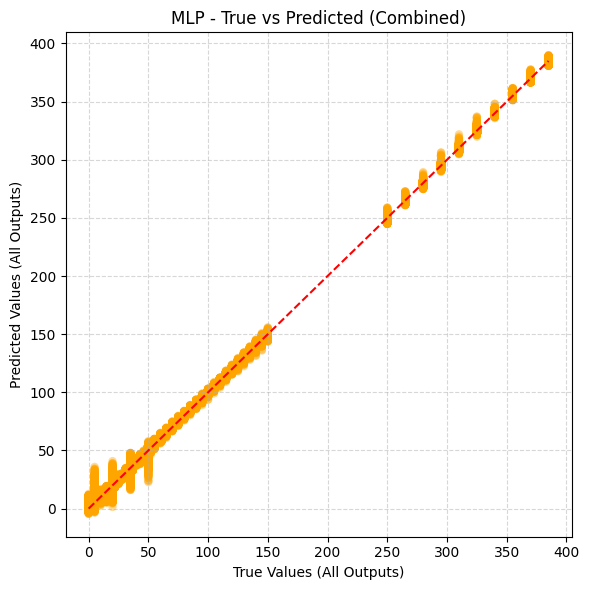

2205/2205 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


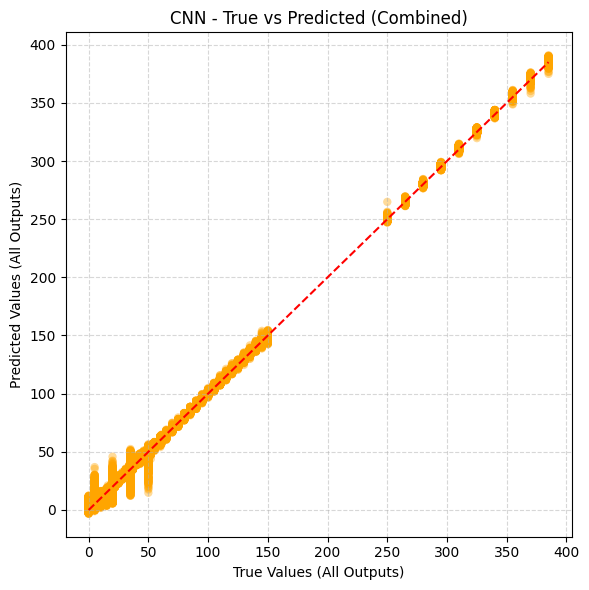

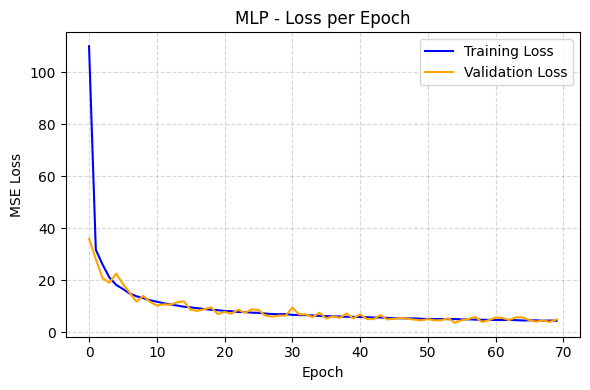

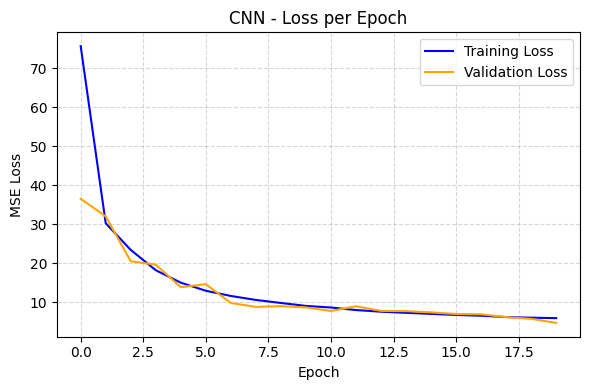

In [10]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_true_vs_predicted_combined(y_true, y_pred, model_name='Model'):
    """
    Eén scatterplot waarin alle outputs en samples samen worden geplot.
    """
    true_flat = y_true.flatten()
    pred_flat = y_pred.flatten()

    plt.figure(figsize=(6, 6))
    plt.scatter(true_flat, pred_flat, alpha=0.4, color='orange', edgecolors='none')
    plt.plot([true_flat.min(), true_flat.max()],
             [true_flat.min(), true_flat.max()],
             'r--', linewidth=1.5)
    plt.xlabel('True Values (All Outputs)')
    plt.ylabel('Predicted Values (All Outputs)')
    plt.title(f'{model_name} - True vs Predicted (Combined)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
y_pred_mlp = mlp_model.predict(X_val_mlp)
plot_true_vs_predicted_combined(y_val_mlp, y_pred_mlp, model_name='MLP')
y_pred_cnn = cnn_model.predict(X_val_cnn)
plot_true_vs_predicted_combined(y_val_cnn, y_pred_cnn, model_name='CNN')


import matplotlib.pyplot as plt

def plot_loss_per_epoch(history, model_name='Model'):
    """
    Plot training en validation loss per epoch.
    `history` is het object geretourneerd door .fit()
    """
    history_dict = history.history
    if 'loss' not in history_dict or 'val_loss' not in history_dict:
        print(f"⚠️ 'loss' of 'val_loss' niet beschikbaar in history van {model_name}.")
        return

    plt.figure(figsize=(6, 4))
    plt.plot(history_dict['loss'], label='Training Loss', color='blue')
    plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'{model_name} - Loss per Epoch')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_loss_per_epoch(mlp_history, model_name='MLP')
plot_loss_per_epoch(cnn_history, model_name='CNN')


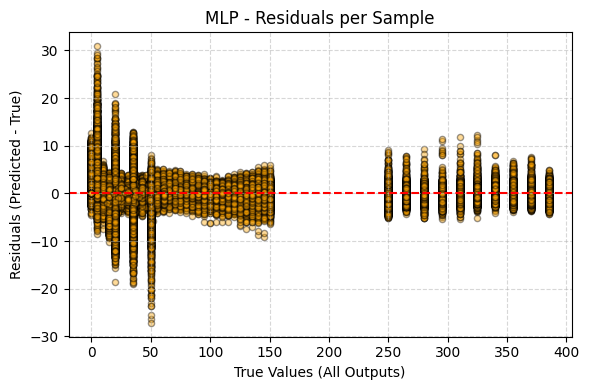

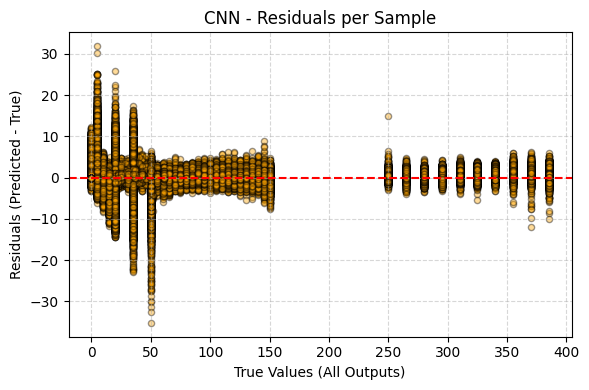

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_residuals(y_true, y_pred, model_name='Model'):
    """
    Plot de residuals (voorspelling - echte waarde) versus de echte waarden.
    Handig om systematische fouten te detecteren.
    """
    true_flat = y_true.flatten()
    pred_flat = y_pred.flatten()
    residuals = pred_flat - true_flat

    plt.figure(figsize=(6, 4))
    plt.scatter(true_flat, residuals, alpha=0.4, color='orange', edgecolors='k', s=20)
    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.xlabel('True Values (All Outputs)')
    plt.ylabel('Residuals (Predicted - True)')
    plt.title(f'{model_name} - Residuals per Sample')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_residuals(y_val_mlp, y_pred_mlp, model_name='MLP')
plot_residuals(y_val_cnn, y_pred_cnn, model_name='CNN')


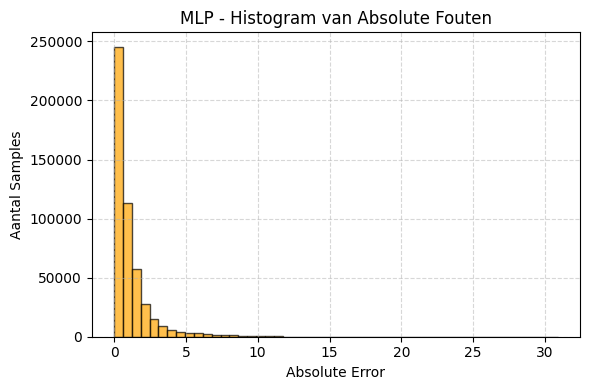

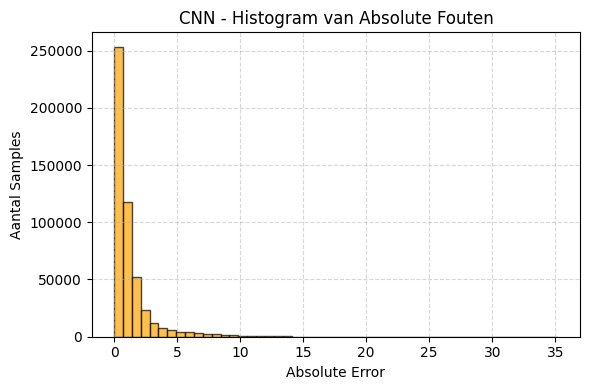

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_error_histogram(y_true, y_pred, model_name='Model', bins=50):
    """
    Plot een histogram van de absolute fouten voor alle outputs gecombineerd.
    """
    true_flat = y_true.flatten()
    pred_flat = y_pred.flatten()
    abs_errors = np.abs(pred_flat - true_flat)

    plt.figure(figsize=(6, 4))
    plt.hist(abs_errors, bins=bins, color='orange', edgecolor='black', alpha=0.7)
    plt.xlabel('Absolute Error')
    plt.ylabel('Aantal Samples')
    plt.title(f'{model_name} - Histogram van Absolute Fouten')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_error_histogram(y_val_mlp, y_pred_mlp, model_name='MLP')
plot_error_histogram(y_val_cnn, y_pred_cnn, model_name='CNN')


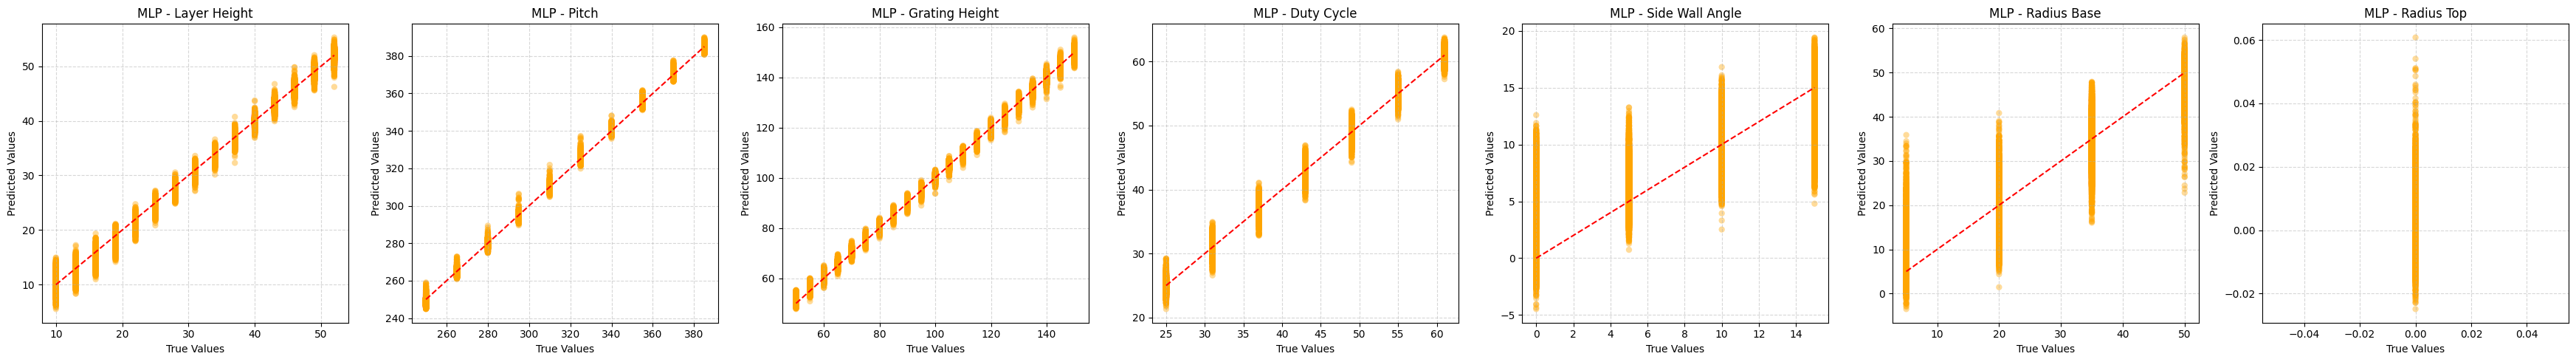

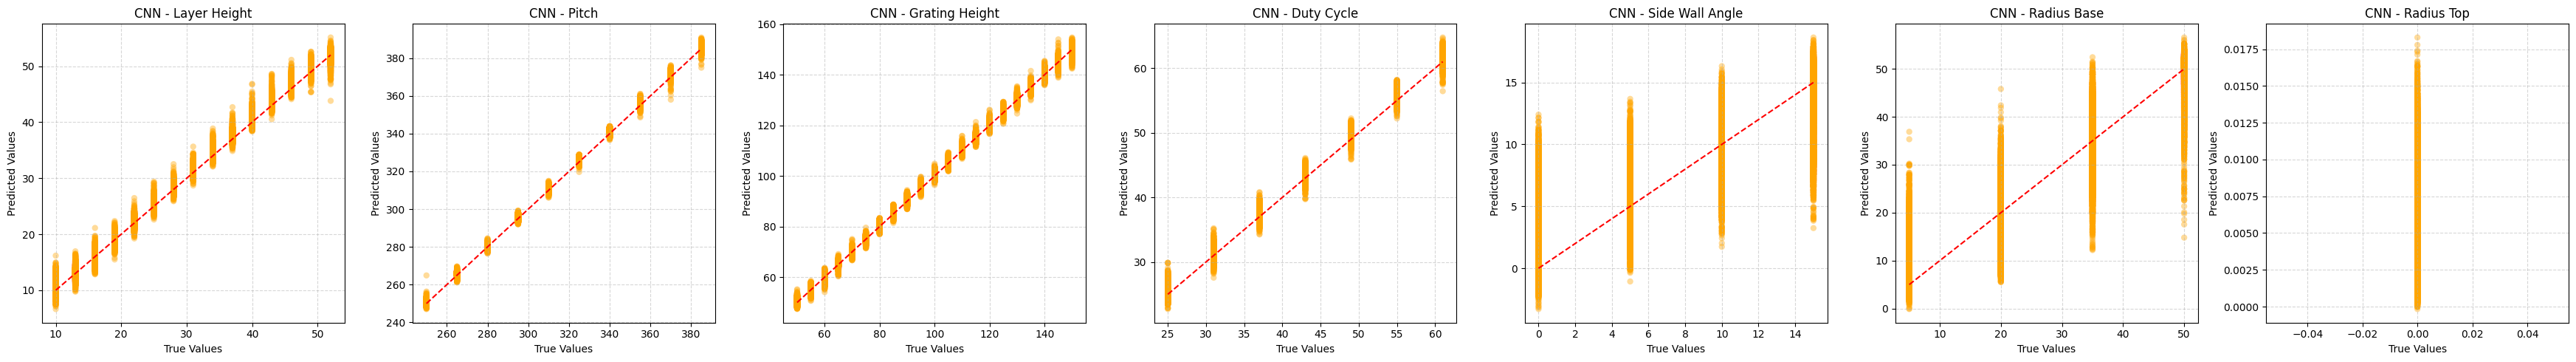

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_parity_per_output(y_true, y_pred, model_name='Model', output_names=None):
    """
    Maakt pariteitplots (y_true vs y_pred) per outputparameter.
    """
    num_outputs = y_true.shape[1]

    if output_names is None:
        output_names = [f'Output {i+1}' for i in range(num_outputs)]

    fig, axs = plt.subplots(1, num_outputs, figsize=(5 * num_outputs, 5))

    for i in range(num_outputs):
        ax = axs[i] if num_outputs > 1 else axs
        ax.scatter(y_true[:, i], y_pred[:, i], alpha=0.4, color='orange', edgecolors='none')
        ax.plot([y_true[:, i].min(), y_true[:, i].max()],
                [y_true[:, i].min(), y_true[:, i].max()],
                'r--', linewidth=1.5)
        ax.set_xlabel('True Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{model_name} - {output_names[i]}')
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
output_names = ["Layer Height", "Pitch", "Grating Height", "Duty Cycle", "Side Wall Angle",
                   "Radius Base", "Radius Top"]  # Pas aan op jouw outputs

plot_parity_per_output(y_val_mlp, y_pred_mlp, model_name='MLP', output_names=output_names)
plot_parity_per_output(y_val_cnn, y_pred_cnn, model_name='CNN', output_names=output_names)

In [2]:

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

X = np.load('/content/drive/MyDrive/Colab Notebooks/symmetric_line_grating_database.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/symmetric_line_grating_geometry.npy')

X = X.reshape(X.shape[0], -1)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("First 5 rows of features (X):")
print(X[:5])
print("\nFirst 5 rows of targets (y):")
print(y[:5])

base_model = XGBRegressor(
    random_state=42,
    verbosity=0,
    tree_method='hist',
    device='cuda'
)

multioutput_model = MultiOutputRegressor(base_model)

param_grid = {
    'estimator__n_estimators': [350],
    'estimator__max_depth': [9],
    'estimator__learning_rate': [0.2],
}


grid_search = GridSearchCV(
    estimator=multioutput_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

print("\nBest hyperparameters:", grid_search.best_params_)
print("\nEvaluation on validation set:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_val_pred))
print("R²-score:", r2_score(y_val, y_val_pred))
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Root Mean Squared Error (RMSE):", rmse)

First 5 rows of features (X):
[[0.00814019 0.0083219  0.00849033 ... 0.0507533  0.05319741 0.05598724]
 [0.00870746 0.00893416 0.00915291 ... 0.03423307 0.03594168 0.03789281]
 [0.00905176 0.0093027  0.00954713 ... 0.02403442 0.02524656 0.02662006]
 [0.0092859  0.0095519  0.00981204 ... 0.01753107 0.01840264 0.01938881]
 [0.00946106 0.00973712 0.01000814 ... 0.01333772 0.01397801 0.01469817]]

First 5 rows of targets (y):
[[ 10. 250.  50.  25.   0.   5.   0.]
 [ 10. 265.  50.  25.   0.   5.   0.]
 [ 10. 280.  50.  25.   0.   5.   0.]
 [ 10. 295.  50.  25.   0.   5.   0.]
 [ 10. 310.  50.  25.   0.   5.   0.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best hyperparameters: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 9, 'estimator__n_estimators': 350}

Evaluation on validation set:
Mean Absolute Error (MAE): 1.8882735078253519
R²-score: 0.9052638854585501
Root Mean Squared Error (RMSE): 3.8743220210648848


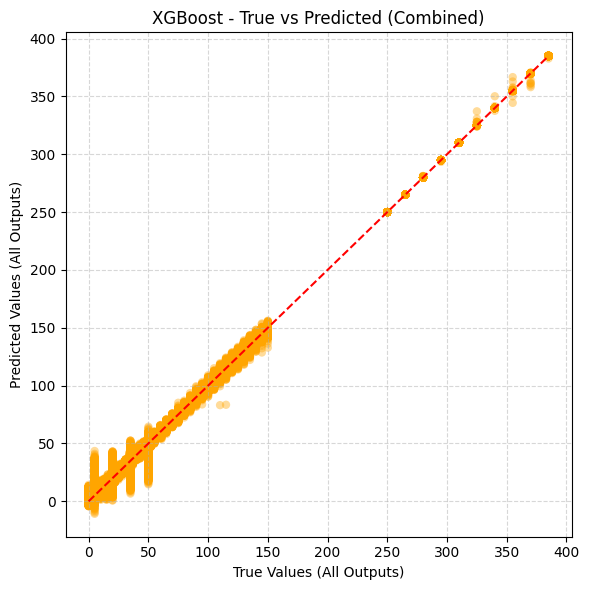

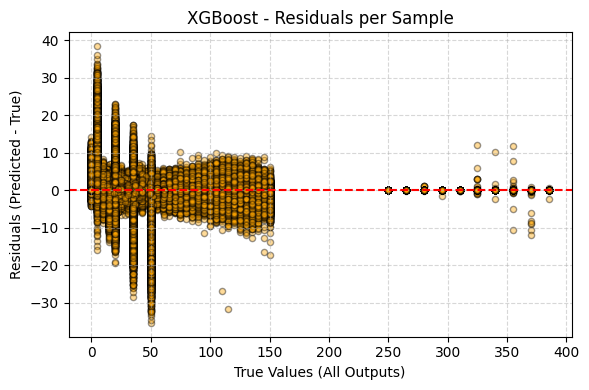

In [5]:
import matplotlib.pyplot as plt
def plot_true_vs_predicted_combined(y_true, y_pred, model_name='Model'):
    true_flat = y_true.flatten()
    pred_flat = y_pred.flatten()

    plt.figure(figsize=(6, 6))
    plt.scatter(true_flat, pred_flat, alpha=0.4, color='orange', edgecolors='none')
    plt.plot([true_flat.min(), true_flat.max()],
             [true_flat.min(), true_flat.max()],
             'r--', linewidth=1.5)
    plt.xlabel('True Values (All Outputs)')
    plt.ylabel('Predicted Values (All Outputs)')
    plt.title(f'{model_name} - True vs Predicted (Combined)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_residuals_xgb(y_true, y_pred, model_name='XGBoost'):
    true_flat = y_true.flatten()
    pred_flat = y_pred.flatten()
    residuals = pred_flat - true_flat

    plt.figure(figsize=(6, 4))
    plt.scatter(true_flat, residuals, alpha=0.4, color='orange', edgecolors='k', s=20)
    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.xlabel('True Values (All Outputs)')
    plt.ylabel('Residuals (Predicted - True)')
    plt.title(f'{model_name} - Residuals per Sample')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_true_vs_predicted_combined(y_val, y_val_pred, model_name='XGBoost')
plot_residuals_xgb(y_val, y_val_pred, model_name='XGBoost')
